
<br>
# Damped Pendulum Simulation<br>
This notebook demonstrates the numerical solution of a damped pendulum system described by:<br>
θ''(t) + b·θ'(t) + (g/L)·sin(θ(t)) = 0<br>
Where:<br>
- θ(t): Angular displacement (radians)<br>
- b: Damping coefficient (1/s)<br>
- g: Gravitational acceleration (9.81 m/s²)<br>
- L: Pendulum length (m)<br>
<br>
%%

In [4]:
pip install seaborn

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

%% [markdown]


<br>
## 1. Define the Pendulum System<br>
We convert the 2nd-order ODE to a system of 1st-order ODEs:<br>
- θ'(t) = ω(t)<br>
- ω'(t) = -b·ω(t) - (g/L)·sin(θ(t))<br>
<br>
%%

In [7]:
def pendulum(y, t, b, L):
    """System of ODEs for damped pendulum"""
    θ, ω = y  # Unpack state variables
    g = 9.81  # Gravitational constant (m/s²)
    dθdt = ω
    dωdt = -b*ω - (g/L)*np.sin(θ)
    return [dθdt, dωdt]

%% [markdown]


<br>
## 2. Simulation Parameters<br>
<br>
%%<br>
Physical parameters

In [8]:
b = 0.5   # Damping coefficient (1/s)
L = 1.0   # Pendulum length (m)

Initial conditions

In [9]:
θ0 = np.pi/4  # Initial angle (45 degrees)
ω0 = 0.0      # Initial angular velocity (rad/s)
y0 = [θ0, ω0]

Time grid

In [10]:
t = np.linspace(0, 10, 1000)  # 10 seconds simulation

%% [markdown]


<br>
## 3. Numerical Solution<br>
Using `scipy.integrate.odeint` to solve the system<br>
<br>
%%

In [11]:
solution = odeint(pendulum, y0, t, args=(b, L))
θ, ω = solution.T  # Transpose to get θ(t) and ω(t) separately

%% [markdown]


<br>
## 4. Visualization<br>
<br>
%%

In [12]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Angular displacement plot

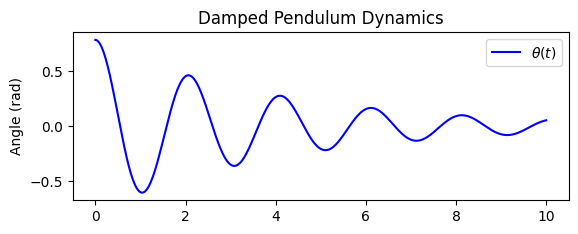

In [13]:
plt.subplot(2, 1, 1)
plt.plot(t, θ, 'b', label=r'$\theta(t)$')
plt.ylabel('Angle (rad)')
plt.title('Damped Pendulum Dynamics')
plt.legend()

Angular velocity plot

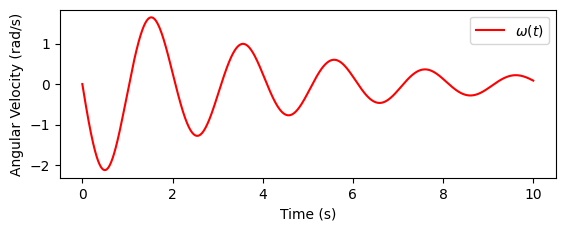

In [14]:
plt.subplot(2, 1, 2)
plt.plot(t, ω, 'r', label=r'$\omega(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()

In [15]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>


<br>
## 5. Phase Portrait (Optional)<br>
Visualizing ω vs θ shows the system's trajectory in phase space<br>
<br>
%%

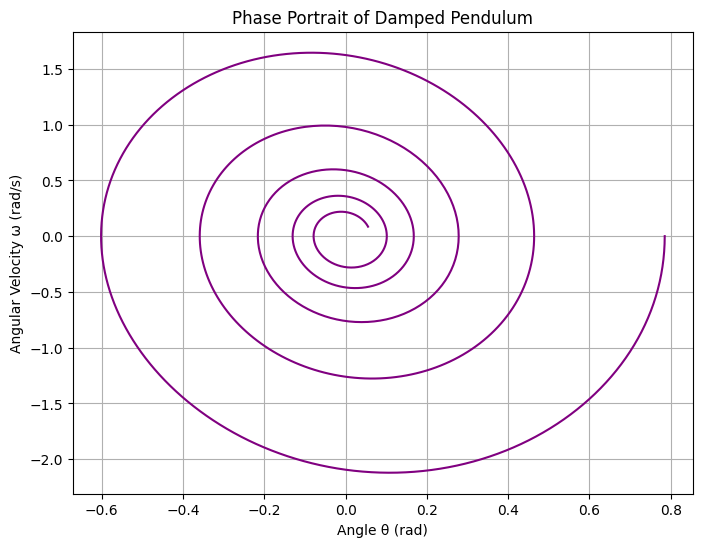

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(θ, ω, 'purple')
plt.xlabel('Angle θ (rad)')
plt.ylabel('Angular Velocity ω (rad/s)')
plt.title('Phase Portrait of Damped Pendulum')
plt.grid(True)
plt.show()